Task 2 - User Engagement analysis

As telecom brands are the data providers of all online activities, meeting user requirements, and creating an engaging user experience is a prerequisite for them. Building & improving the QoS (Quality of Service) to leverage the mobile platforms and to get more users for the business is good but the success of the business would be determined by the user engagement and activity of the customers on available apps. 

In telecommunication, tracking the user activities on the database sessions is a good starting point to appreciate the user engagement for the overall applications and per application as well. If we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to concentrate network resources for different clusters of customers based on the engagement scores.

In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
sessions frequency 

the duration of the session 

the sessions total traffic (download and upload (bytes))

Task 2.1 - Based on the above submit python script and slide :

1.Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

2.Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

3.Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

4.Aggregate user total traffic per application and derive the top 10 most engaged users per application

5.Plot the top 3 most used applications using appropriate charts. 

6.Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
What is the optimized value of k (use elbow method for this)?  
Interpret your findings. 



In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('../data/to_trasform.csv')

In [3]:
df.head(2)

,Unnamed: 0,Bearer_Id,Dur. (ms),IMSI,MSISDN,IMEI,last_location,avg_rtt_dl,avg_rtt_ul,throughput_avg_dl_kpbs,throughput_avg_ul_kpbs,retrans_packets_dl_b,retrans_packets_ul_b,tp_dl_below_50kbps_pc,tp_dl_50_250kbps_pc,tp_dl_250kbps_1mbps_pc,tp_dl_above_1mbps_pc,tp_ul_below_10kpbs_pc,tp_ul_10_50_kbps_pc,tp_ul_50_300_kbps_pc,tp_ul_above_300_kpbs_pc,activity_duration_dl,activity_duration_ul,Dur. (ms).1,phone_company,phone_name,t_vol_dl_above_6250B,t_vol_ul_above_1250B,socials_dl_b,socials_ul_b,google_dl_b,google_ul_b,email_dl_b,email_ul_b,youtube_dl_b,youtube_ul_b,netflix_dl_b,netflix_ul_b,gaming_dl_b,gaming_ul_b,other_dl_b,other_ul_b,Total_ul_b,Total_dl_b,total_ul_data,total_dl_data,socials_total_b,google_total_b,email_total_b,youtube_total_b,netflix_total_b,gaming_total_b,other_total_b,total_b
0,0,13114483460844900352,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42,5,23,44,20884183,766247,100,0,0,0,100,0,0,0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,36749741,480624086,1570185,2905912,3701304,18355943,17855187,292426453,180558843,345629377
1,1,13114483482878900224,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,20884183,766247,100,0,0,0,100,0,0,0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,53800391,1180289203,1933278,4414096,937385,39359124,35565545,609920783,541959383,707185356


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 

1.sessions frequency 

2.the duration of the session 

3.the sessions total traffic (download and upload (bytes))



1.Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [4]:
session_frequency=df.groupby(['MSISDN'])["Dur. (ms).1"].count().reset_index(name='session_count')

In [5]:
session_frequency.sort_values(['session_count'], ascending=False).head(10)

,MSISDN,session_count
13467,33626320676,18
6404,33614892860,17
13123,33625779332,17
36909,33659725664,16
92584,33760536639,15
76077,33675877202,15
64883,33667163239,13
1270,33604515716,12
92239,33760413819,12
658,33603127838,12


Aggregation by session duration

In [6]:
session_duration=df.groupby(['MSISDN'])["Dur. (ms).1"].sum().reset_index(name='total_duration')

In [7]:
session_duration.sort_values(['total_duration'], ascending=False).head(10)

,MSISDN,total_duration
13123,33625779332,18553763486
6404,33614892860,9966905758
92584,33760536639,9279442000
13467,33626320676,8791936680
64883,33667163239,8744922020
50096,33662840755,6614274287
56951,33664693736,6288735771
658,33603127838,6287767483
65787,33667456716,5649885358
92239,33760413819,5321673794


Total upload and download

In [8]:
df['total_dl_ul']=df['total_dl_data'] + df['total_ul_data']

In [9]:
total_session_b=df.groupby(['MSISDN'])["total_dl_ul"].sum().reset_index(name='total_data')

In [10]:
total_session_b.sort_values(['total_data'], ascending=False).head(10)

,MSISDN,total_data
6404,33614892860,16341524035
13467,33626320676,15996644092
13123,33625779332,14701273330
76077,33675877202,14556184322
36909,33659725664,13888413360
92584,33760536639,13104812243
62804,33666464084,11570705616
30591,33658361927,11358177354
658,33603127838,11198899762
86138,33698792269,11139052121


# Task 2.1 

 
Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

.


In [11]:
data  = pd.merge(total_session_b, session_duration, on='MSISDN', how='left')
data  = pd.merge(data, session_frequency, on='MSISDN', how='left')

In [12]:
data.head(10)

,MSISDN,total_data,total_duration,session_count
0,33601001722,1255787564,116720140,1
1,33601001754,436417344,181230963,1
2,33601002511,1091052984,134969374,1
3,33601007832,447568699,49878024,1
4,33601008617,2235054657,37104453,2
5,33601010682,1095575829,253983077,2
6,33601011634,859918491,128360523,2
7,33601011959,510773383,86399977,1
8,33601014694,2016653584,495702147,2
9,33601020306,866204929,124854778,1


# Normalization

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [13]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import decomposition
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

C:\Users\kachase\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [14]:
from sklearn.preprocessing import Normalizer
import seaborn as sns


norm = Normalizer()
    
normalized_data = norm.fit_transform(data)




In [15]:
normalized_data.shape

(106471, 4)

k-means

In [16]:
kmeanModel = KMeans(n_clusters=3, random_state = 0)
kmeanModel.fit_predict(normalized_data )
#print(kmeans.cluster_centers_)

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
kmeanModel.inertia_

17.05467424862771

In [18]:
kmeanModel.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
features = data.copy()

In [20]:
labels = kmeanModel.labels_
varieties = features['MSISDN'].to_list()

In [21]:
np.array(np.unique(labels, return_counts=True)).T

array([[    0, 74464],
       [    1,  4728],
       [    2, 27279]], dtype=int64)

In [22]:
data_cluster = pd.DataFrame({'CLUSTERS': labels, 'MSISDN': varieties})

In [23]:
data_cluster['CLUSTERS'].value_counts().to_frame()

,CLUSTERS
0,74464
2,27279
1,4728


In [24]:
data2 = pd.merge(data,data_cluster, on='MSISDN')
data2.head()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
0,33601001722,1255787564,116720140,1,0
1,33601001754,436417344,181230963,1,0
2,33601002511,1091052984,134969374,1,0
3,33601007832,447568699,49878024,1,0
4,33601008617,2235054657,37104453,2,2


# Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [25]:
data2_0 = data2[data2['CLUSTERS'] == 0]
data2_1 = data2[data2['CLUSTERS'] == 1]
data2_2 = data2[data2['CLUSTERS'] == 2]

In [26]:
data2_0.shape

(74464, 5)

In [27]:
data2_0.describe()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
count,74464,74464,74464,74464,74464
mean,50091236646,873347106,108418414,1,0
std,3461281088331,301650254,80345049,0,0
min,33601001722,58362293,7142988,1,0
25%,33650788515,657241906,57179283,1,0
50%,33663668868,896656394,86583414,1,0
75%,33683645017,1111628602,143708415,1,0
max,882397108489451,1407548816,2083210006,4,0


In [28]:
data2_1.shape

(4728, 5)

In [29]:
data2_1.describe()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
count,4728,4728,4728,4728,4728
mean,33677300944,3992605579,535322107,4,1
std,43504188,1089282447,629948803,1,0
min,33601034530,2608284800,33476692,2,1
25%,33658759616,3249926495,296320128,3,1
50%,33664184722,3686552172,387414358,4,1
75%,33684116055,4398808620,518331394,5,1
max,33789881186,16341524035,18553763486,18,1


In [30]:
data2_2.shape

(27279, 5)

In [31]:
data2_2.describe()

,MSISDN,total_data,total_duration,session_count,CLUSTERS
count,27279,27279,27279,27279,27279
mean,33674129753,1915778448,183343303,2,2
std,45338633,418152505,133949395,1,0
min,33601008617,1356439704,7342167,1,2
25%,33650875060,1548680042,86400009,1,2
50%,33663516947,1816921603,170093196,2,2
75%,33682870024,2216556568,246468769,2,2
max,33789980299,2994737796,1867677937,5,2


In [32]:
pd.options.display.float_format = '{:,.2f}'.format
average_measures = data2.iloc[:,2:].groupby(['CLUSTERS']).mean()


In [33]:
average_measures.T.style.highlight_max(color = 'lightgreen', axis = 1).format("{:,.2f}")

CLUSTERS,0,1,2
total_duration,"108,418,414.31","535,322,107.01","183,343,303.32"
session_count,1.06,4.02,1.86


In [34]:
average_measures.T.style.highlight_min(color = 'pink', axis = 1).format("{:,.2f}")

CLUSTERS,0,1,2
total_duration,"108,418,414.31","535,322,107.01","183,343,303.32"
session_count,1.06,4.02,1.86


# Aggregation based on social media

In [56]:
social_media_traffic=df.groupby(['MSISDN'])["socials_total_b"].sum().reset_index(name='socials_total')

In [57]:
social_media_traffic.sort_values(['socials_total'], ascending=False).head(5)

,MSISDN,socials_total
13467,"33,626,320,676.00","43,374,779.00"
92584,"33,760,536,639.00","39,783,189.00"
36909,"33,659,725,664.00","35,412,358.00"
6404,"33,614,892,860.00","28,294,544.00"
13123,"33,625,779,332.00","27,135,500.00"


# Aggregation based on google

In [58]:
google_traffic=df.groupby(['MSISDN'])["google_total_b"].sum().reset_index(name='google_total')

In [59]:
google_traffic.sort_values(['google_total'], ascending=False).head(5)

,MSISDN,google_total
13467,"33,626,320,676.00","152,191,852.00"
13123,"33,625,779,332.00","142,307,915.00"
6404,"33,614,892,860.00","127,973,787.00"
92584,"33,760,536,639.00","123,223,099.00"
36909,"33,659,725,664.00","116,516,345.00"


# Aggregation based on email

In [60]:
email_traffic=df.groupby(['MSISDN'])["email_total_b"].sum().reset_index(name='mail_total')

In [61]:
email_traffic.sort_values(['mail_total'], ascending=False).head(5)

,MSISDN,mail_total
13467,"33,626,320,676.00","42,418,782.00"
6404,"33,614,892,860.00","40,788,634.00"
13123,"33,625,779,332.00","40,633,966.00"
105756,"33,786,323,068.00","36,310,123.00"
36909,"33,659,725,664.00","35,999,792.00"


# Aggregation based on YouTube

In [62]:
youtube_traffic=df.groupby(['MSISDN'])["youtube_total_b"].sum().reset_index(name='yt_total')

In [63]:
youtube_traffic.sort_values(['yt_total'], ascending=False).head(5)

,MSISDN,yt_total
13123,"33,625,779,332.00","452,958,769.00"
92584,"33,760,536,639.00","396,289,198.00"
6404,"33,614,892,860.00","394,370,218.00"
13467,"33,626,320,676.00","374,483,047.00"
76077,"33,675,877,202.00","317,410,572.00"


# Aggregation based on Netflix

In [64]:
netflix_traffic=df.groupby(['MSISDN'])["netflix_total_b"].sum().reset_index(name='netflix_total')

In [65]:
netflix_traffic.sort_values(['netflix_total'], ascending=False).head(5)

,MSISDN,netflix_total
36909,"33,659,725,664.00","399,519,079.00"
6404,"33,614,892,860.00","361,401,046.00"
13123,"33,625,779,332.00","356,980,607.00"
92584,"33,760,536,639.00","334,643,269.00"
13467,"33,626,320,676.00","328,725,740.00"


# Aggregation based on Gaming

In [66]:
gaming_traffic=df.groupby(['MSISDN'])["gaming_total_b"].sum().reset_index(name='gaming_total')

In [67]:
gaming_traffic.sort_values(['gaming_total'], ascending=False).head(5)

,MSISDN,gaming_total
6404,"33,614,892,860.00","7,749,432,234.00"
92584,"33,760,536,639.00","7,461,045,228.00"
13123,"33,625,779,332.00","7,326,673,487.00"
76077,"33,675,877,202.00","6,970,567,597.00"
13467,"33,626,320,676.00","6,887,572,116.00"


# Aggregation based on Other

In [68]:
other_traffic=df.groupby(['MSISDN'])["other_total_b"].sum().reset_index(name='other_total')

In [70]:
other_traffic.sort_values(['other_total'], ascending=False).head(5)

,MSISDN,other_total
13467,"33,626,320,676.00","8,167,877,776.00"
6404,"33,614,892,860.00","7,639,263,572.00"
76077,"33,675,877,202.00","6,798,515,150.00"
13123,"33,625,779,332.00","6,354,583,086.00"
658,"33,603,127,838.00","6,326,670,874.00"


# App perfomance

In [71]:
total_socials = df['socials_total_b'].sum()
print ('Total bytes for social media are :')
print(total_socials)
print('-'*60)

total_google = df['google_total_b'].sum()
print ('Total bytes for google are :')
print(total_google)
print('-'*60)

total_email = df['email_total_b'].sum()
print ('Total bytes for email are :')
print(total_email)
print('-'*60)

total_youtube = df['youtube_total_b'].sum()
print ('Total bytes for youtube are :')
print(total_youtube)
print('-'*60)

total_netflix = df['netflix_total_b'].sum()
print ('Total bytes for netflix are :')
print(total_netflix)
print('-'*60)

total_gaming = df['gaming_total_b'].sum()
print ('Total bytes for gaming are :')
print(total_gaming)
print('-'*60)

total_other = df['other_total_b'].sum()
print ('Total bytes for other are :')
print(total_other)
print('-'*60)

sum_of_totals_dl = df['total_dl_data'].sum()
print ('The running totals for all app downloads are :')
print(sum_of_totals_dl)
print('-'*60)

sum_of_totals_ul = df['total_ul_data'].sum()
print (' The running totals for all app uploads are :')
print(sum_of_totals_ul)

Total bytes for social media are :
271478798103.0
------------------------------------------------------------
Total bytes for google are :
1159544186717.0
------------------------------------------------------------
Total bytes for email are :
335503000148.0
------------------------------------------------------------
Total bytes for youtube are :
3362537620065.0
------------------------------------------------------------
Total bytes for netflix are :
3360563670772.0
------------------------------------------------------------
Total bytes for gaming are :
63910124731666.0
------------------------------------------------------------
Total bytes for other are :
63770726326023.0
------------------------------------------------------------
The running totals for all app downloads are :
130064004756909.0
------------------------------------------------------------
 The running totals for all app uploads are :
6106473576585.0


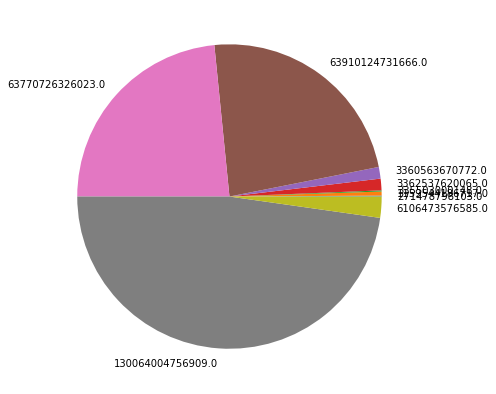

In [72]:
import matplotlib.pyplot as plt


data = [total_socials ,total_google ,total_email ,total_youtube ,total_netflix ,total_gaming ,total_other ,sum_of_totals_dl 

,sum_of_totals_ul]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = data)
 
# show plot
plt.show()

Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: What is the optimized value of k (use elbow method for this)?
Interpret your findings

In [73]:
data  = pd.merge(total_session_b, session_duration, on='MSISDN', how='left')
data  = pd.merge(data, session_frequency, on='MSISDN', how='left')

In [74]:
engagement=pd.merge(data, other_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, gaming_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, netflix_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, youtube_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, google_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, email_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, other_traffic, on='MSISDN', how='left')
engagement=pd.merge(engagement, social_media_traffic, on='MSISDN', how='left')

In [75]:
engagement.head(2)

,MSISDN,total_data,total_duration,session_count,other_total_x,gaming_total,netflix_total,yt_total,google_total,mail_total,other_total_y,socials_total
0,"33,601,001,722.00","1,255,787,564.00","116,720,140.00",1,"386,570,872.00","812,458,661.00","27,180,981.00","21,624,548.00","4,389,005.00","1,331,362.00","386,570,872.00","2,232,135.00"
1,"33,601,001,754.00","436,417,344.00","181,230,963.00",1,"281,710,071.00","119,750,078.00","11,221,763.00","12,432,223.00","5,334,863.00","3,307,781.00","281,710,071.00","2,660,565.00"


In [78]:
cat_features=['MSISDN']

In [79]:
numerical_features = ['total_data','total_duration','session_count','other_total_x','gaming_total','netflix_total','yt_total','google_total','mail_total','other_total_y','socials_total']

In [80]:
input_features = numerical_features + cat_features

In [81]:
features = engagement.copy()

# Encoding categorical variables

In [83]:
#casting the columns into strings
labelencoder = LabelEncoder()

#features[cat_features] = features[cat_features].apply(LabelEncoder().fit_transform)
features[cat_features] = features[cat_features].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')

# Scaling Numerical Data

In [88]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features[input_features])
#x_scaled

C:\Users\kachase\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kachase\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [89]:
import scipy.stats as stats
X_scaled = stats.zscore(x_scaled)
#X_scaled

# Elbow method to determine the clusters

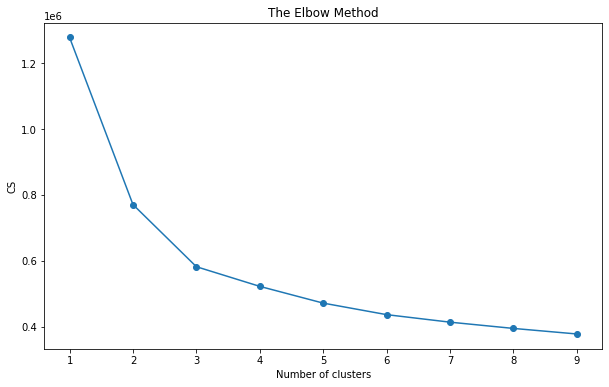

In [90]:
X = X_scaled


#sns.set(rc={"figure.figsize": (6, 8)})
plt.figure(figsize=(10,6))
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [92]:
kmeanModel = KMeans(n_clusters=4, random_state = 0)
kmeanModel.fit_predict(x_scaled)
#print(kmeans.cluster_centers_)

array([0, 0, 0, ..., 0, 2, 0])

In [93]:
kmeanModel.inertia_

522445.04696950305

In [94]:
kmeanModel.labels_
#print(kmeans.labels_)

array([0, 0, 0, ..., 0, 2, 0])

In [95]:
labels = kmeanModel.labels_
varieties = features['MSISDN'].to_list()

In [96]:
np.array(np.unique(labels, return_counts=True)).T

array([[    0, 39357],
       [    1,  3967],
       [    2, 39600],
       [    3, 23547]], dtype=int64)

In [100]:
engagement_cluster = pd.DataFrame({'CLUSTERS': labels, 'MSISDN': varieties})

In [101]:
engagement_cluster['CLUSTERS'].value_counts().to_frame()

,CLUSTERS
2,39600
0,39357
3,23547
1,3967


In [111]:
engagement_cluster.head()

,CLUSTERS,MSISDN
0,0,1
1,0,17583
2,0,28694
3,0,39805
4,3,50916


In [112]:
engagement2 = pd.merge(engagement,engagement_cluster, on='MSISDN')
engagement2.shape

(0, 13)

---Check out the clusters here